# Iris Dataset

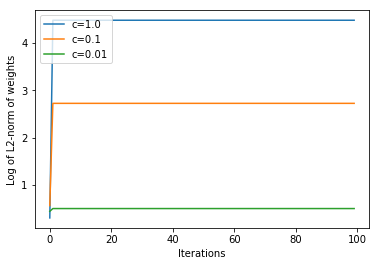

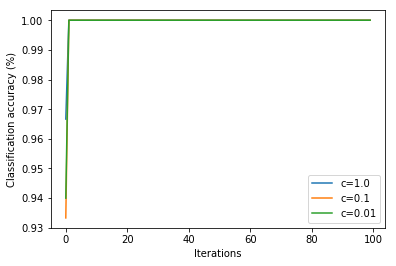

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import array, dot, random
from random import choice
from math import log



data = pd.read_csv( 'Fisher.csv' )
m = data.as_matrix()
labels = m[:,0]
labels[ labels==2 ] = 1  # squash class 2 into class 1
labels = np.atleast_2d( labels ).T
features = m[:,1:5]

col = np.ones([len(features), 1])
biasedfeatures = np.append(features,col,1)

step_function = lambda x: 0 if x < 0 else 1

# labels is a vector
# features is a matrix

learningrates = np.array([1, 0.1, 0.01])
epochs = 100



for c in learningrates:
    norms = np.zeros(epochs)
    accuracy = np.zeros(epochs)
    weights = np.random.rand(len(biasedfeatures[0]))
    for e in range(0,epochs):
        norms[e] = np.linalg.norm(weights,2)
        err_cnt = 0
        for i in range(0,len(biasedfeatures)):
            x = biasedfeatures[i]
            expected = labels[i]
            y = dot(weights, x)
            error = expected - step_function(y)
            if (np.asscalar(error) != 0):
                err_cnt += 1
            weights += c * error * x
        accuracy[e] = 1 - (float(err_cnt) / len(biasedfeatures))
          
    log_norms = np.log(norms)        
    plt.figure(1)
    plt.plot(log_norms, label = "c=" + str(c))
    plt.xlabel("Iterations")
    plt.ylabel("Log of L2-norm of weights")
    plt.legend()

    plt.figure(2)
    plt.plot(accuracy, label=("c=" + str(c)))
    plt.xlabel("Iterations")
    plt.ylabel("Classification accuracy (%)")
    plt.legend()

    
plt.show()



# CIFAR-10 Dataset

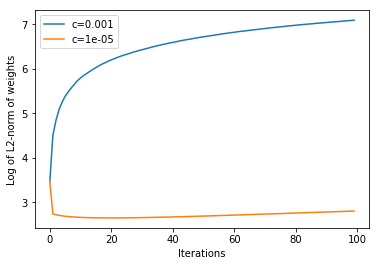

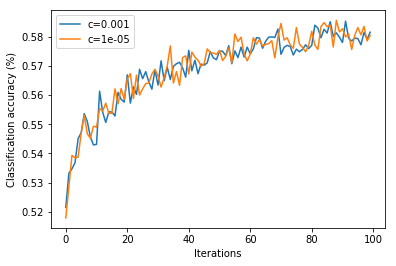

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import array, dot, random
from random import choice


def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
labels[ labels < 5 ] = 0
labels[ labels >= 5 ] = 1

col = np.ones([len(features), 1])
biasedfeatures = np.append(features,col,1)

step_function = lambda x: 0 if x < 0 else 1

# labels is a vector
# features is a matrix

learningrates = np.array([0.001, 0.00001])
epochs = 100



for c in learningrates:
    norms = np.zeros(epochs)
    accuracy = np.zeros(epochs)
    weights = np.random.rand(len(biasedfeatures[0]))
    for e in range(0,epochs):
        norms[e] = np.linalg.norm(weights,2)
        err_cnt = 0
        for i in range(0,len(biasedfeatures)):
            x = biasedfeatures[i]
            expected = labels[i]
            y = dot(weights, x)
            error = expected - step_function(y)
            if (np.asscalar(error) != 0):
                err_cnt += 1
            weights += c * error * x
        accuracy[e] = 1 - (float(err_cnt) / len(biasedfeatures))
 
    log_norms = np.log(norms)        
    plt.figure(1)
    plt.plot(log_norms, label = "c=" + str(c))
    plt.xlabel("Iterations")
    plt.ylabel("Log of L2-norm of weights")
    plt.legend()

    plt.figure(2)
    plt.plot(accuracy, label=("c=" + str(c)))
    plt.xlabel("Iterations")
    plt.ylabel("Classification accuracy (%)")
    plt.legend()
    

plt.show()
